# Covid-19 forecasting using Prophet

This project aims to utilize the Prophet library in Python to forecast COVID-19 cases, providing valuable insights into future trends.

Methodology:

1. Data Preparation: The COVID-19 dataset is loaded into a Pandas DataFrame and preprocessed to ensure consistency and accuracy.
2. Time Series Analysis: The Prophet library is used to model the time series data, capturing both trend and seasonality.
3. Model Training: The Prophet model is trained on historical COVID-19 case data to learn patterns and relationships.
4. Forecasting: The trained model is used to generate forecasts for future COVID-19 cases based on the learned patterns.
5. Evaluation: The accuracy of the forecasts is evaluated using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
6. Visualization: The forecasted COVID-19 cases are visualized using Matplotlib and Seaborn to provide intuitive insights into future trends.


 Índice

1. [Introducción](#introducción)
2. [Data](##data)
3. [Exploratory Data Analysis](##exploratory-data-analysis)


### Loading Libraries and constants

In [1]:
import numpy as np
import pandas as pd
import malib.data.clean as mc
import malib.data.format as mf
import malib.data.plotting as mp

In [2]:
PATH = "../../data/raw/covid_19_clean_complete.csv"
DS = "Date"
Y = "Confirmed"
SAVE_PATH = "../../data/processed/"
FILE_NAME = "df_clean_target_confirmed.csv"

## Data

The data we are going to use is [COVID-19 Dataset](https://www.kaggle.com/datasets/imdevskp/corona-virus-report) from '2020-01-22' to '2020-07-27'

The parameter TIME_AHEAD sets the number of days that you want to predict in advance. The more in the future you want to predict, the less accurate the prediction will be.

The parameter SPLIT_RATIOS sets number and proportion of ratios for train and test dataset (validation dataset optional if third value is inserted). It always has to sum 1.

In [3]:
# load data
df_raw = pd.read_csv(PATH)

In [4]:
# View the first few rows of the dataframe
display(df_raw.head())

# View general information about the dataframe
display(df_raw.info())

# Statistical description of the dataframe
display(df_raw.describe())


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


None

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


## Data Transform & Clean

In [5]:
# Transform date and target columns into model format required
df = mf.format_date(df_raw,DS, Y)

In [15]:
CLEANING_RULES = {
    'del_negative': True, # Delete rows with negavites values in target column
    'del_days': None,  # Delete days of weeks. i.e. 0 (mondays) 6 (sundays)
    'del_zeros': None, # Delete rows with zeros in target column,
    'log_transform': None # Transform column y into log
}

In [21]:
# Transform date and target columns into model format required
dfc = mf.format_date(df_raw,DS, Y)

# Cleaning dataset
dfc = mc.clean_df(dfc,Y,CLEANING_RULES)

In [22]:
# Format into forecast dataframe
dfc = mf.format_input_and_target(dfc,DS, Y)

In [23]:
# Group by country and date
dfc = mf.group_by_columns_and_sum(dfc,['ds'],['y'])

In [24]:
dfc

,ds,y
0,2020-01-22,555.0
1,2020-01-23,654.0
2,2020-01-24,941.0
3,2020-01-25,1434.0
4,2020-01-26,2118.0
...,...,...
183,2020-07-23,15510481.0
184,2020-07-24,15791645.0
185,2020-07-25,16047190.0
186,2020-07-26,16251796.0


## Exploratory Data Analysis

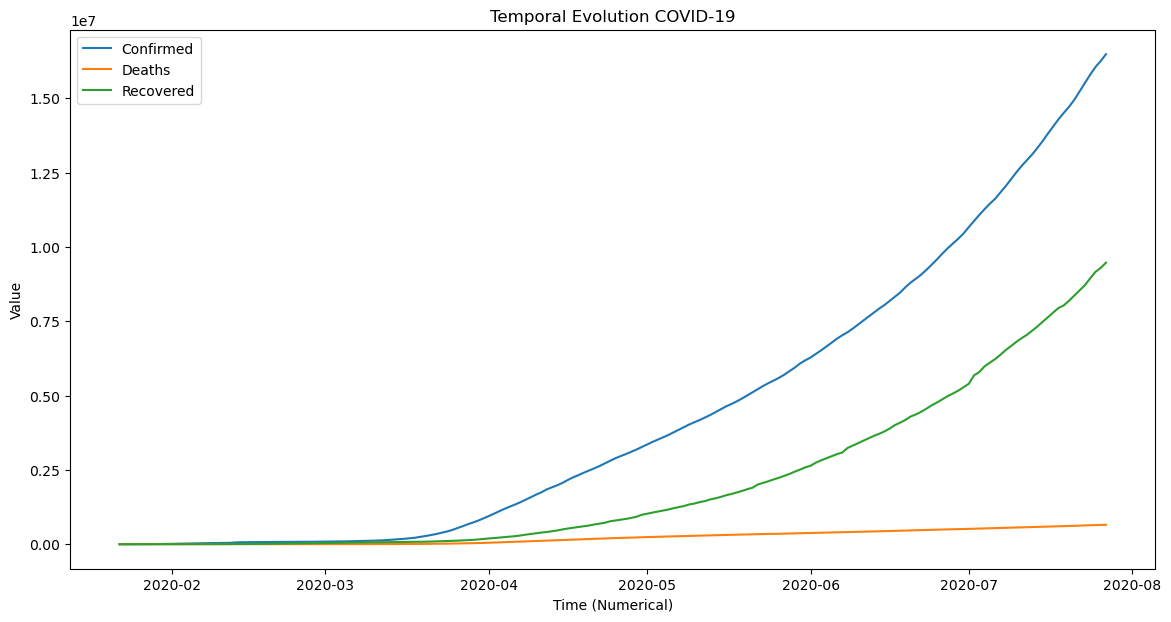

In [25]:
mp.plot_time_series(df,DS,['Confirmed','Deaths','Recovered'],False,"Temporal Evolution COVID-19")

In [26]:
# mp.plot_numeric_correlation_heatmap(df)

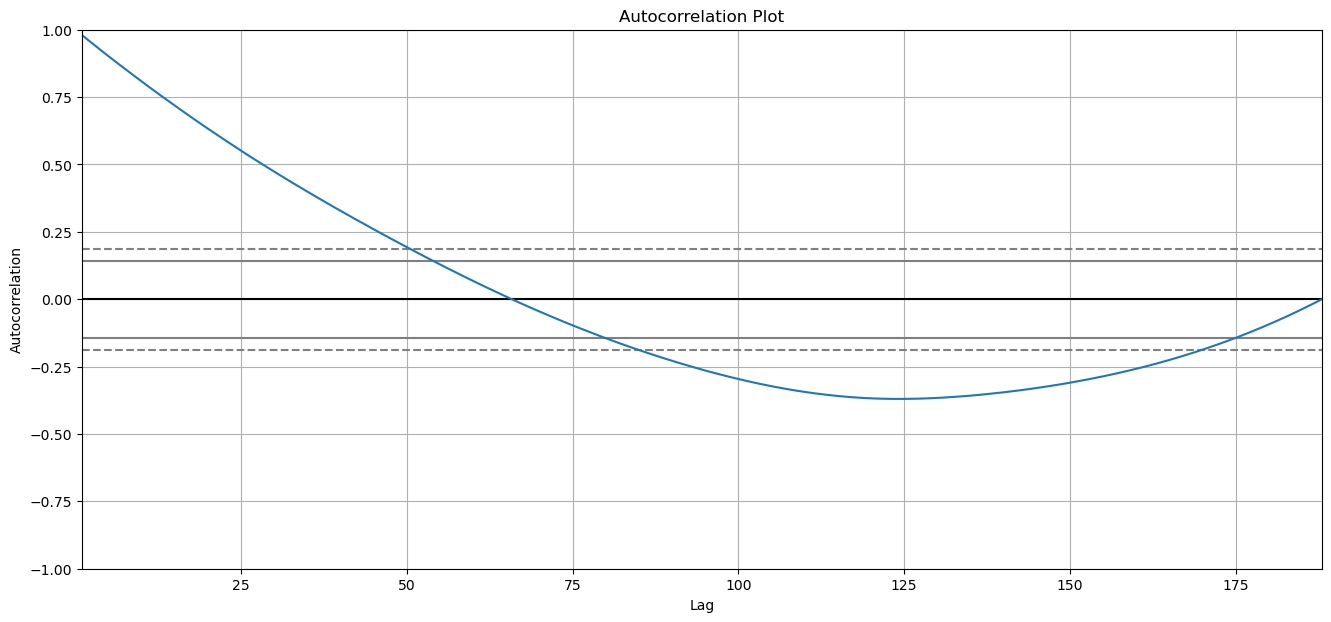

In [27]:
mp.plot_autocorrelation(df, DS, Y)

Autocorrelation 

How It Works: Use autocorrelation (ACF) plot to identify the time lags with the highest correlations. High correlations at certain lags suggest that recent months are predictive of future values.

Application: Select a training window based on significant lags from ACF plot. If the autocorrelations drop off quickly, a shorter training window may be effective; if they are sustained over time, consider a longer window.


### Analysis of the Graph

**High Autocorrelation at Small Lags:**

- The plot shows a very high positive autocorrelation for small lags, which gradually decreases. This indicates that values that are close together in time are strongly correlated. 
- This is common in time series with a strong trend, where consecutive points are similar because each value is close to the previous one. In the context of a COVID-19 dataset, this could imply that case counts from one day to the next or week to week are closely related, reflecting a consistent increase or trend over time.

**Gradual Decay in Autocorrelation:**

- The autocorrelation decreases gradually as the lag increases, following a curve that eventually dips close to zero and even goes slightly negative.
- This gradual decay is typical of time series with trends, where current values depend on past values across a long period. The trend could indicate an ongoing process, such as the continuous spread of infections, where each day's case count builds on a history of previous counts.
- This pattern is often seen in non-stationary data, where trends or seasonality exist.

**Return to Low (Near-Zero) Autocorrelation at High Lags:**

- At very high lags, the autocorrelation approaches zero, suggesting that values far apart in time are less correlated.
- This behavior is expected in many temporal processes, as values separated by a large time gap tend to lose their direct influence on each other. In a COVID-19 dataset, this could mean that infections from, say, several months ago have little direct relationship with infections today.

### Interpretation and Implications

- **Trend Presence**: The high autocorrelation at small lags and gradual decay suggest a trend in the data, indicating that the series is likely non-stationary. This means that before modeling (e.g., using ARIMA or other time-series models), you might need to make the data stationary through differencing or detrending.
- **Long-Term Dependence**: The gradual decrease also suggests that the current values are affected by a relatively long history of past values, which could be useful if considering a lagged model.
- **Modeling Implications**: Given the trend, a differencing approach might be needed to stabilize the series, and you may need to consider models that can capture long-term dependencies.

If this analysis is of COVID-19 cases, it suggests that cases follow a continuous growth trend rather than fluctuating randomly. This information is crucial in forecasting, as it indicates the potential need for trend-based models.

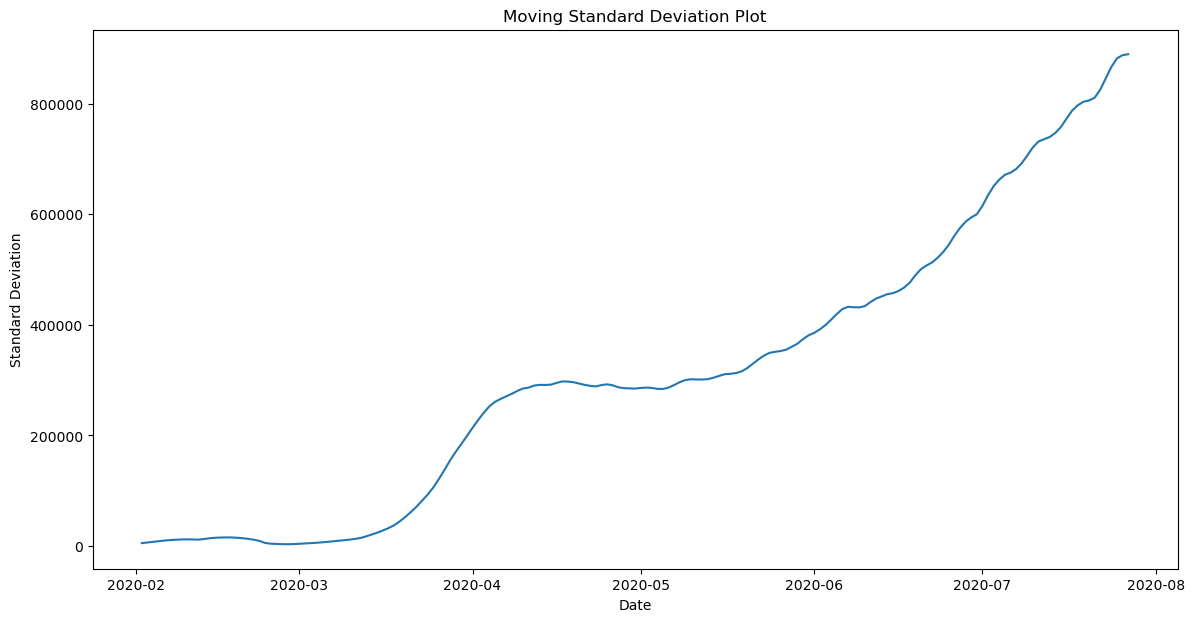

In [31]:
mp.plot_moving_std(df, DS, Y, window=12)

### Analysis of the Graph

**Low Initial Variability:**

At the beginning of the period (January to February 2020), the standard deviation is low, indicating that the confirmed COVID-19 cases were relatively stable and there were no major fluctuations.

**Gradual Increase in Variability:**

Starting in March 2020, the standard deviation begins to gradually increase. This suggests that the variability in the number of confirmed cases is increasing, possibly due to the spread of the virus and the variation in response policies and testing across different regions.

**High Variability in Subsequent Months:**

From April to July 2020, the standard deviation continues to increase steadily. This indicates greater fluctuations in confirmed cases, reflecting the spread of the virus in different waves and outbreaks.
The high variability could be associated with factors such as changes in lockdown policies, variations in testing rates, superspreading events, and other social and epidemiological dynamics.

<Figure size 1600x700 with 0 Axes>

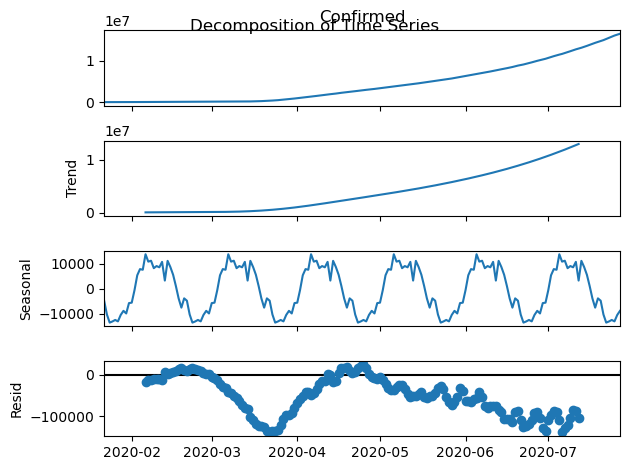

In [32]:
mp.plot_decompose_time_series(df, DS, Y)

### Analysis of the Graph

1. **Original Series (Confirmed)**
   - The first subplot shows the original time series of confirmed COVID-19 cases. Here, we can observe how the confirmed cases have varied over time.

2. **Trend**
   - The second subplot shows the long-term trend of the time series. This trend represents the general behavior of the number of confirmed cases without considering seasonal fluctuations and residuals.
   - In this case, we can see that the trend is upward, indicating a continuous increase in the number of confirmed cases over time.

3. **Seasonality**
   - The third subplot shows the seasonal component of the time series. This component captures periodic variations that occur at regular intervals (e.g., weekly or monthly patterns).
   - Here, we can see that there is a clear seasonality with a regular pattern of increase and decrease in confirmed cases, which seems to repeat over a certain period of time.

4. **Residual**
   - The fourth subplot shows the residual, which is the part of the time series that remains after removing the trend and seasonality. It represents random fluctuations and noise that are not explained by the other two components.
   - In this case, the residuals show variations that do not follow a clear pattern and seem quite random, although with some significant fluctuations.

In [33]:
dfc.to_csv(SAVE_PATH+FILE_NAME, index=False)